In [1]:
import torch
import torch.nn as nn

from torch.optim import Adam
from torch.distributions.uniform import Uniform
from torch.utils.data import DataLoader, TensorDataset

import lightning as L

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
inputs = torch.tensor([
    [1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0],
])
labels = torch.tensor([
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 0.0],
])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

In [10]:
class WordEmbeddings(L.LightningModule):
    def __init__(self):
        super().__init__()
        
        self.input_to_hidden = nn.Linear(in_features=4, out_features=2, bias=False)
        self.hidden_to_output = nn.Linear(in_features=2, out_features=4, bias=False)
        self.loss = nn.CrossEntropyLoss()

    def forward(self, input):
        hidden = self.input_to_hidden(input)
        output_values = self.hidden_to_output(hidden)
        return output_values
    
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=0.1)

    def training_step(self, batch, batch_idx):
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = self.loss(output_i, label_i)
        return loss


In [11]:
model = WordEmbeddings()

data = {
    'w1': model.input_to_hidden.weight.detach()[0].numpy(),
    'w2': model.input_to_hidden.weight.detach()[0].numpy(),
    'token': ['Troll 2', 'is', 'great', 'Matrix'],
    'input': ['input1', 'input2', 'input3', 'input4']
}
df = pd.DataFrame(data)
df

,w1,w2,token,input
0,-0.032008,-0.032008,Troll 2,input1
1,0.249438,0.249438,is,input2
2,-0.141046,-0.141046,great,input3
3,-0.306928,-0.306928,Matrix,input4


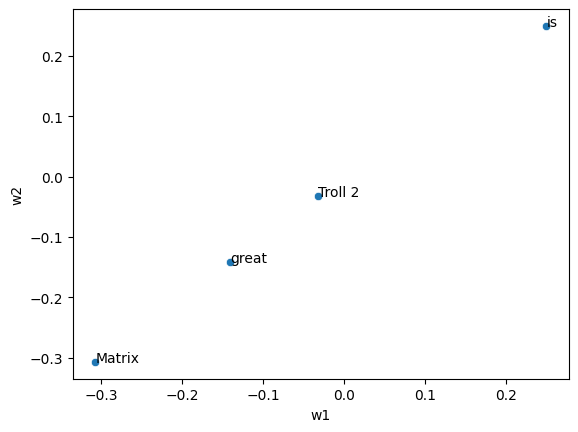

In [12]:
sns.scatterplot(data=df, x='w1', y='w2')
for i in range(4):
    plt.text(df.w1[i], df.w2[i], df.token[i])

In [13]:
trainer = L.Trainer(max_epochs=200)
trainer.fit(model, train_dataloaders=dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name             | Type             | Params | Mode 
--------------------------------------------------------------
0 | input_to_hidden  | Linear           | 8      | train
1 | hidden_to_output | Linear           | 8      | train
2 | loss             | CrossEntropyLoss | 0      | train
--------------------------------------------------------------
16        Trainable params
0         Non-trainable params
16        Total params
0.000     Total estimated model params size (MB)
3         Modules in train mode
0         Modules in eval mode
c:\Users\11ukn\AppData\Local\Programs\Python\Python310\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
c:\User

Epoch 0:   0%|          | 0/4 [00:00<?, ?it/s] 

Epoch 199: 100%|██████████| 4/4 [00:00<00:00, 174.23it/s, v_num=6]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 4/4 [00:00<00:00, 118.79it/s, v_num=6]


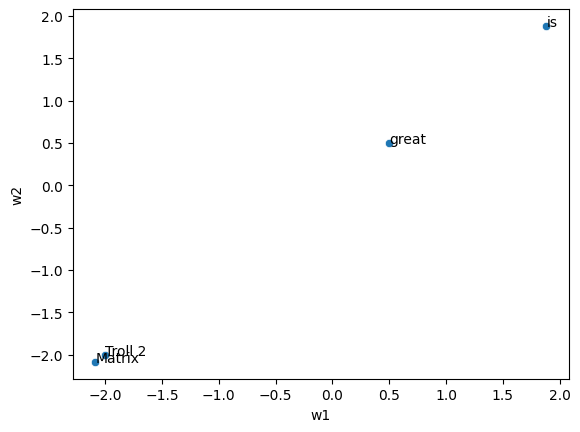

In [14]:
data = {
    'w1': model.input_to_hidden.weight.detach()[0].numpy(),
    'w2': model.input_to_hidden.weight.detach()[0].numpy(),
    'token': ['Troll 2', 'is', 'great', 'Matrix'],
    'input': ['input1', 'input2', 'input3', 'input4']
}
df = pd.DataFrame(data)
df
sns.scatterplot(data=df, x='w1', y='w2')
for i in range(4):
    plt.text(df.w1[i], df.w2[i], df.token[i])